In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!git clone https://github.com/ultralytics/ultralytics

In [ ]:
%cd ultralytics

In [ ]:
pip install -r requirements.txt

In [ ]:
from IPython.display import Image, clear_output # for displaying images
import torch
import os
#import utils
#from utils.google_utils import gdrive_download

#display = utils.notebook_init()  # checks

print('torch %s %s' % (torch.__version__,
                       torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

roboflow key for preprocessed dataset

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="PRx3zXfYgeOfdalqzpso")
project = rf.workspace("fyp-mzhvf").project("plantdoc-zqlwe")
dataset = project.version(28).download("yolov8")


model training using the preprocessed dataset

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8s.yaml').load('yolov8s.pt')  # build from YAML and transfer weights
#model = YOLO('v8nca.yaml')
#model = YOLO('v8ncaghost.yaml')
#model = YOLO('v8nghost.yaml')
#model = YOLO('v8sca.yaml')
#model = YOLO('v8scaghost.yaml')
#model = YOLO('v8sghost.yaml')

# Train the model
model.train(data='/content/PlantDoc-28/data.yaml', epochs=100, imgsz=640)

Code for resume training

In [ ]:
from ultralytics import YOLO

model = YOLO("/content/drive/MyDrive/FYP5/ultralytics/runs/detect/train2/weights/last.pt")
model.train(resume=True)

model training with transfer learning

In [ ]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8s.yaml').load('yolov8s.pt')  # build from YAML and transfer weights
#model = YOLO('v8nca.yaml').load('yolov8n.pt')
#model = YOLO('v8ncaghost.yaml').load('yolov8n.pt')
#model = YOLO('v8nghost.yaml').load('yolov8n.pt')
#model = YOLO('v8sca.yaml').load('yolov8n.pt')
#model = YOLO('v8scaghost.yaml').load('yolov8n.pt')
#model = YOLO('v8sghost.yaml').load('yolov8n.pt')

# Train the model
model.train(data='/content/PlantDoc-28/data.yaml', epochs=100, imgsz=640)

validating model using testing set

In [ ]:
from ultralytics import YOLO

# Load a pretrained YOLOv8n model
model = YOLO('/content/drive/MyDrive/FYPTraining/YOLOv8s/scratch/weights/best.pt')
metrics = model.val(data='/content/PlantDoc-28/data.yaml', split='test')


Graphs plotting

In [ ]:
import os, pandas as pd, glob
val_files = glob.glob("/content/drive/MyDrive/FYP/datasets/plantdocv4/valid/labels/*.txt")
val_files = list(filter(lambda file: os.stat(file).st_size > 0, val_files))
train_files = glob.glob("/content/drive/MyDrive/FYP/datasets/plantdocv4/train/labels/*.txt")
train_files = list(filter(lambda file: os.stat(file).st_size > 0, train_files))
test_files = glob.glob("/content/drive/MyDrive/FYP/datasets/plantdocv4/test/labels/*.txt")
test_files = list(filter(lambda file: os.stat(file).st_size > 0, test_files))
total_files = val_files + train_files + test_files

In [ ]:
#import os, pandas as pd, glob
pd.set_option('display.max_columns', 6)
df = pd.DataFrame()
l = [pd.read_csv(filename, header=None, delim_whitespace=True) for filename in total_files]
df = pd.concat(l, ignore_index=True)

In [ ]:
species = {0 : "Apple leaf",
            1 : "Bell_pepper leaf",
            2 : "Bell_pepper leaf spot",
            3 : "Blueberry leaf",
            4 : "Cherry leaf",
            5 : 'Corn leaf blight',
            6 : 'Peach leaf',
            7 : 'Potato leaf early blight',
            8 : 'Potato leaf late blight',
            9 : 'Raspberry leaf',
            10 : 'Soyabean leaf',
            11 : 'Squash Powdery mildew leaf',
            12 : 'Strawberry leaf',
            13 : 'Tomato Septoria leaf spot',
            14 : 'Tomato leaf',
            15 : 'Tomato leaf bacterial spot',
            16 : 'Tomato leaf mosaic virus',
            17 : 'Tomato leaf yellow virus',
            18 : 'Tomato mold leaf'}

 df["Species"] = df[0].map(species)
 #print(df)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

x,y=12,7
plt.figure(figsize = (x,y))

#ax = df.Species.value_counts().plot(kind='bar', colormap='Paired', stacked=True)
ax = sns.countplot(x='Species', data=df, palette= "mako")
for container in ax.containers:
    ax.bar_label(container, rotation = 90)

plt.ylabel("Number of Instances")
plt.xlabel("Leave Species", fontsize = 15)
plt.xticks(rotation=90)
plt.title("Total Number of Class Instances in PlantDoc Dataset", fontsize = 15, fontname = "Monospace", alpha = .6)
#plt.xticks([])
#plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

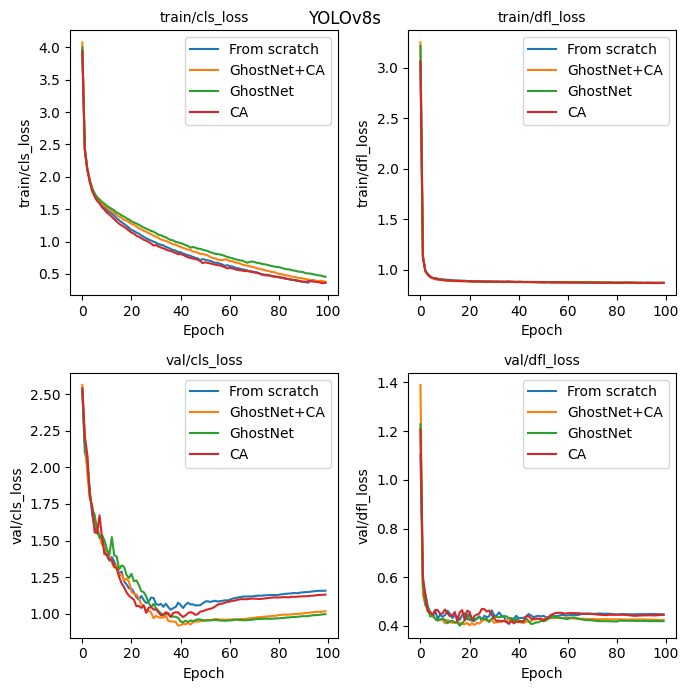

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the first CSV file (scratch.csv)
ghost_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet/results.csv")

# Read the data from the second CSV file (TL.csv)
tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet+TL/results.csv")

scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/scratch/results.csv")

ca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/CA/results.csv")

ghostca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet+CA/results.csv")

# Extract the 'train/boxloss' column from each dataset
scratch_loss = scratch_data["         train/cls_loss"]
tl_loss = tl_data["         train/cls_loss"]
ghost_loss = ghost_data["         train/cls_loss"]
ca_loss = ca_data["         train/cls_loss"]
ghostca_loss= ghostca_data["         train/cls_loss"]

# Create the x-axis values (assumed to be the indices of the datasets)
epochs = scratch_data['                  epoch']

# Create a new figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# Plot graph 1 (top-left)
axs[0, 0].plot(epochs, scratch_loss, label='From scratch')
axs[0, 0].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[0, 0].plot(epochs, ghost_loss, label='GhostNet')
axs[0, 0].plot(epochs, ca_loss, label='CA')
axs[0, 0].set_title('train/cls_loss', fontsize=10)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('train/cls_loss')
axs[0, 0].legend()

scratch_loss = scratch_data["         train/dfl_loss"]
tl_loss = tl_data["         train/dfl_loss"]
ghost_loss = ghost_data["         train/dfl_loss"]
ca_loss = ca_data["         train/dfl_loss"]
ghostca_loss= ghostca_data["         train/dfl_loss"]

# Plot graph 2 (top-right)
axs[0, 1].plot(epochs, scratch_loss, label='From scratch')
axs[0, 1].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[0, 1].plot(epochs, ghost_loss, label='GhostNet')
axs[0, 1].plot(epochs, ca_loss, label='CA')
axs[0, 1].set_title('train/dfl_loss', fontsize=10)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('train/dfl_loss')
axs[0, 1].legend()

scratch_loss = scratch_data["           val/cls_loss"]
tl_loss = tl_data["           val/cls_loss"]
ghost_loss = ghost_data["           val/cls_loss"]
ca_loss = ca_data["           val/cls_loss"]
ghostca_loss= ghostca_data["           val/cls_loss"]

# Plot graph 2 (top-right)
axs[1, 0].plot(epochs, scratch_loss, label='From scratch')
axs[1, 0].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[1, 0].plot(epochs, ghost_loss, label='GhostNet')
axs[1, 0].plot(epochs, ca_loss, label='CA')
axs[1, 0].set_title('val/cls_loss', fontsize=10)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('val/cls_loss')
axs[1, 0].legend()

scratch_loss = scratch_data["           val/dfl_loss"]
tl_loss = tl_data["           val/dfl_loss"]
ghost_loss = ghost_data["           val/dfl_loss"]
ca_loss = ca_data["           val/dfl_loss"]
ghostca_loss= ghostca_data["           val/dfl_loss"]

# Plot graph 2 (top-right)
axs[1, 1].plot(epochs, scratch_loss, label='From scratch')
axs[1, 1].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[1, 1].plot(epochs, ghost_loss, label='GhostNet')
axs[1, 1].plot(epochs, ca_loss, label='CA')
axs[1, 1].set_title('val/dfl_loss', fontsize=10)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('val/dfl_loss')
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle('YOLOv8s')
# Show the graph
plt.show()


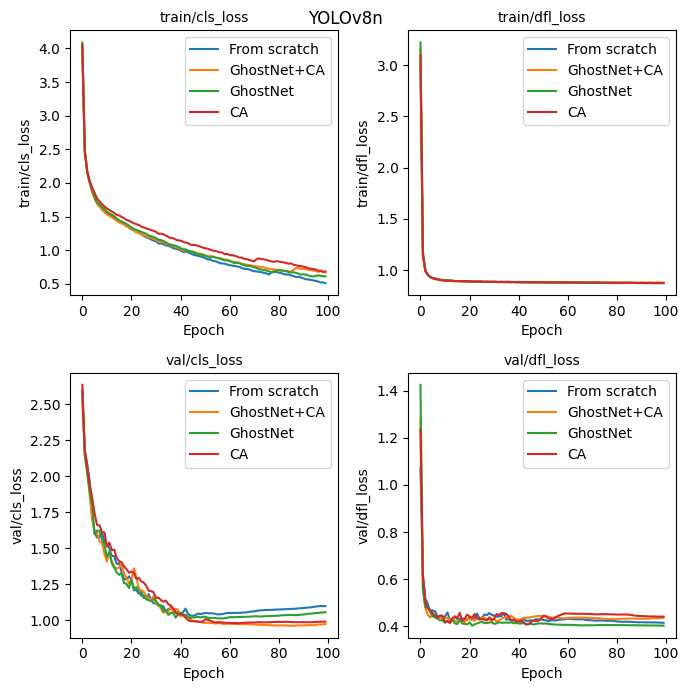

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the first CSV file (scratch.csv)
ghost_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet/results.csv", nrows=100)

# Read the data from the second CSV file (TL.csv)
#tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+TL/results.csv")

scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/scratch/results.csv", nrows=100)

ca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/CA/results.csv", nrows=100)

ghostca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+CA/results.csv", nrows=100)

# Extract the 'train/boxloss' column from each dataset
scratch_loss = scratch_data["         train/cls_loss"]
tl_loss = tl_data["         train/cls_loss"]
ghost_loss = ghost_data["         train/cls_loss"]
ca_loss = ca_data["         train/cls_loss"]
ghostca_loss= ghostca_data["         train/cls_loss"]

# Create the x-axis values (assumed to be the indices of the datasets)
epochs = scratch_data['                  epoch']

# Create a new figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(7, 7))

# Plot graph 1 (top-left)
axs[0, 0].plot(epochs, scratch_loss, label='From scratch')
axs[0, 0].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[0, 0].plot(epochs, ghost_loss, label='GhostNet')
axs[0, 0].plot(epochs, ca_loss, label='CA')
axs[0, 0].set_title('train/cls_loss', fontsize=10)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('train/cls_loss')
axs[0, 0].legend()

scratch_loss = scratch_data["         train/dfl_loss"]
tl_loss = tl_data["         train/dfl_loss"]
ghost_loss = ghost_data["         train/dfl_loss"]
ca_loss = ca_data["         train/dfl_loss"]
ghostca_loss= ghostca_data["         train/dfl_loss"]

# Plot graph 2 (top-right)
axs[0, 1].plot(epochs, scratch_loss, label='From scratch')
axs[0, 1].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[0, 1].plot(epochs, ghost_loss, label='GhostNet')
axs[0, 1].plot(epochs, ca_loss, label='CA')
axs[0, 1].set_title('train/dfl_loss', fontsize=10)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('train/dfl_loss')
axs[0, 1].legend()

scratch_loss = scratch_data["           val/cls_loss"]
tl_loss = tl_data["           val/cls_loss"]
ghost_loss = ghost_data["           val/cls_loss"]
ca_loss = ca_data["           val/cls_loss"]
ghostca_loss= ghostca_data["           val/cls_loss"]

# Plot graph 2 (top-right)
axs[1, 0].plot(epochs, scratch_loss, label='From scratch')
axs[1, 0].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[1, 0].plot(epochs, ghost_loss, label='GhostNet')
axs[1, 0].plot(epochs, ca_loss, label='CA')
axs[1, 0].set_title('val/cls_loss', fontsize=10)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('val/cls_loss')
axs[1, 0].legend()

scratch_loss = scratch_data["           val/dfl_loss"]
tl_loss = tl_data["           val/dfl_loss"]
ghost_loss = ghost_data["           val/dfl_loss"]
ca_loss = ca_data["           val/dfl_loss"]
ghostca_loss= ghostca_data["           val/dfl_loss"]

# Plot graph 2 (top-right)
axs[1, 1].plot(epochs, scratch_loss, label='From scratch')
axs[1, 1].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[1, 1].plot(epochs, ghost_loss, label='GhostNet')
axs[1, 1].plot(epochs, ca_loss, label='CA')
axs[1, 1].set_title('val/dfl_loss', fontsize=10)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('val/dfl_loss')
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle('YOLOv8n')
# Show the graph
plt.show()


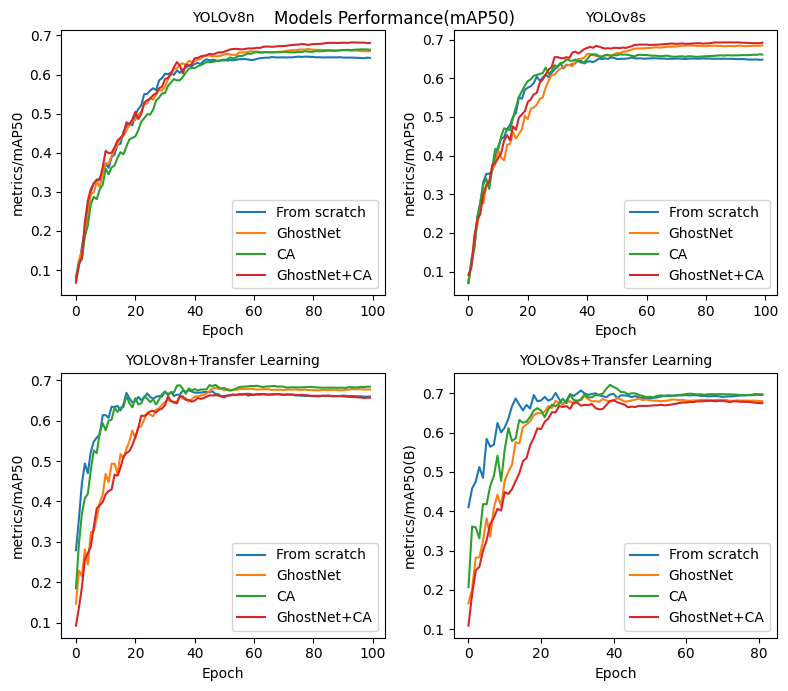

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the first CSV file (scratch.csv)
ghost_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet/results.csv", nrows=100)

# Read the data from the second CSV file (TL.csv)
#tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+TL/results.csv")

scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/scratch/results.csv", nrows=100)

ca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/CA/results.csv", nrows=100)

ghostca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+CA/results.csv", nrows=100)

# Extract the 'train/boxloss' column from each dataset
scratch_loss = scratch_data["       metrics/mAP50(B)"]
tl_loss = tl_data["       metrics/mAP50(B)"]
ghost_loss = ghost_data["       metrics/mAP50(B)"]
ca_loss = ca_data["       metrics/mAP50(B)"]
ghostca_loss= ghostca_data["       metrics/mAP50(B)"]

# Create the x-axis values (assumed to be the indices of the datasets)
epochs = scratch_data['                  epoch']

# Create a new figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 7))

# Plot graph 1 (top-left)
axs[0, 0].plot(epochs, scratch_loss, label='From scratch')
axs[0, 0].plot(epochs, ghost_loss, label='GhostNet')
axs[0, 0].plot(epochs, ca_loss, label='CA')
axs[0, 0].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[0, 0].set_title('YOLOv8n', fontsize=10)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('metrics/mAP50')
axs[0, 0].legend()

ghost_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet/results.csv")

# Read the data from the second CSV file (TL.csv)
tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet+TL/results.csv")

scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/scratch/results.csv")

ca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/CA/results.csv")

ghostca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet+CA/results.csv")

scratch_loss = scratch_data["       metrics/mAP50(B)"]
tl_loss = tl_data["       metrics/mAP50(B)"]
ghost_loss = ghost_data["       metrics/mAP50(B)"]
ca_loss = ca_data["       metrics/mAP50(B)"]
ghostca_loss= ghostca_data["       metrics/mAP50(B)"]

# Plot graph 2 (top-right)
axs[0, 1].plot(epochs, scratch_loss, label='From scratch')
axs[0, 1].plot(epochs, ghost_loss, label='GhostNet')
axs[0, 1].plot(epochs, ca_loss, label='CA')
axs[0, 1].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[0, 1].set_title('YOLOv8s', fontsize=10)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('metrics/mAP50')
axs[0, 1].legend()

ghost_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+TL/results.csv", nrows=100)

# Read the data from the second CSV file (TL.csv)
tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+TL/results.csv", nrows=100)

scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/TL/results.csv")

ca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/CA+TL/results.csv", nrows=100)

ghostca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+CA+TL/results.csv", nrows=100)

scratch_loss = scratch_data["       metrics/mAP50(B)"]
tl_loss = tl_data["       metrics/mAP50(B)"]
ghost_loss = ghost_data["       metrics/mAP50(B)"]
ca_loss = ca_data["       metrics/mAP50(B)"]
ghostca_loss= ghostca_data["       metrics/mAP50(B)"]

# Plot graph 2 (top-right)
axs[1, 0].plot(epochs, scratch_loss, label='From scratch')
axs[1, 0].plot(epochs, ghost_loss, label='GhostNet')
axs[1, 0].plot(epochs, ca_loss, label='CA')
axs[1, 0].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[1, 0].set_title('YOLOv8n+Transfer Learning', fontsize=10)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('metrics/mAP50')
axs[1, 0].legend()

ghost_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet+TL/results.csv", nrows=82)

# Read the data from the second CSV file (TL.csv)
tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet+TL/results.csv", nrows=82)

scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/TL416/results.csv")

ca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/CA+TL416/results.csv", nrows=82)

ghostca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet+CA+TL/results.csv", nrows=82)

scratch_loss = scratch_data["       metrics/mAP50(B)"]
tl_loss = tl_data["       metrics/mAP50(B)"]
ghost_loss = ghost_data["       metrics/mAP50(B)"]
ca_loss = ca_data["       metrics/mAP50(B)"]
ghostca_loss= ghostca_data["       metrics/mAP50(B)"]
epochs = scratch_data['                  epoch']
# Plot graph 2 (top-right)
axs[1, 1].plot(epochs, scratch_loss, label='From scratch')
axs[1, 1].plot(epochs, ghost_loss, label='GhostNet')
axs[1, 1].plot(epochs, ca_loss, label='CA')
axs[1, 1].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[1, 1].set_title('YOLOv8s+Transfer Learning', fontsize=10)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('metrics/mAP50(B)')
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle('Models Performance(mAP50)')
# Show the graph
plt.show()


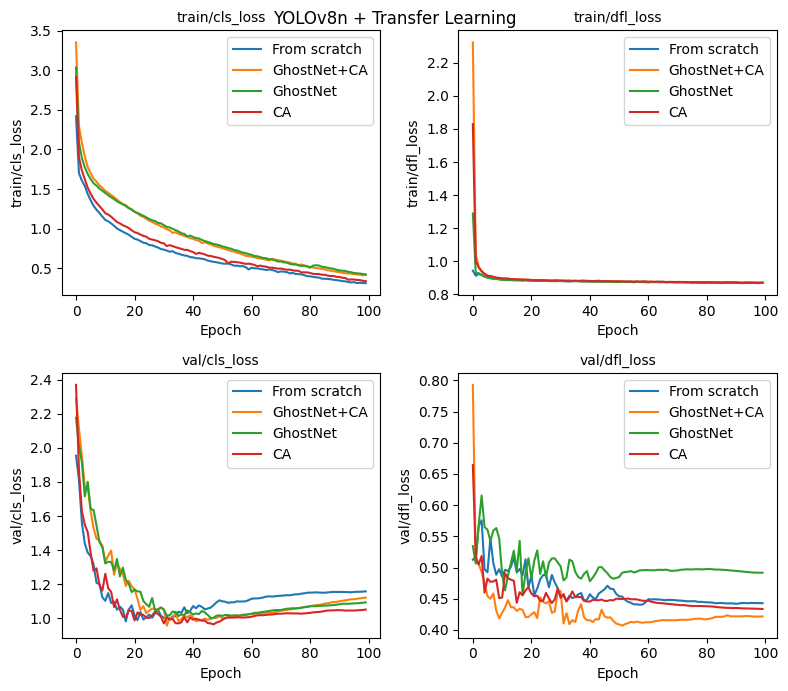

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the first CSV file (scratch.csv)
ghost_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+TL/results.csv", nrows=100)

# Read the data from the second CSV file (TL.csv)
#tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+TL/results.csv")

scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/TL/results.csv", nrows=100)

ca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/CA+TL/results.csv", nrows=100)

ghostca_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+CA+TL/results.csv", nrows=100)

# Extract the 'train/boxloss' column from each dataset
scratch_loss = scratch_data["         train/cls_loss"]
tl_loss = tl_data["         train/cls_loss"]
ghost_loss = ghost_data["         train/cls_loss"]
ca_loss = ca_data["         train/cls_loss"]
ghostca_loss= ghostca_data["         train/cls_loss"]

# Create the x-axis values (assumed to be the indices of the datasets)
epochs = scratch_data['                  epoch']

# Create a new figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 7))

# Plot graph 1 (top-left)
axs[0, 0].plot(epochs, scratch_loss, label='From scratch')
axs[0, 0].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[0, 0].plot(epochs, ghost_loss, label='GhostNet')
axs[0, 0].plot(epochs, ca_loss, label='CA')
axs[0, 0].set_title('train/cls_loss', fontsize=10)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('train/cls_loss')
axs[0, 0].legend()

scratch_loss = scratch_data["         train/dfl_loss"]
tl_loss = tl_data["         train/dfl_loss"]
ghost_loss = ghost_data["         train/dfl_loss"]
ca_loss = ca_data["         train/dfl_loss"]
ghostca_loss= ghostca_data["         train/dfl_loss"]

# Plot graph 2 (top-right)
axs[0, 1].plot(epochs, scratch_loss, label='From scratch')
axs[0, 1].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[0, 1].plot(epochs, ghost_loss, label='GhostNet')
axs[0, 1].plot(epochs, ca_loss, label='CA')
axs[0, 1].set_title('train/dfl_loss', fontsize=10)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('train/dfl_loss')
axs[0, 1].legend()

scratch_loss = scratch_data["           val/cls_loss"]
tl_loss = tl_data["           val/cls_loss"]
ghost_loss = ghost_data["           val/cls_loss"]
ca_loss = ca_data["           val/cls_loss"]
ghostca_loss= ghostca_data["           val/cls_loss"]

# Plot graph 2 (top-right)
axs[1, 0].plot(epochs, scratch_loss, label='From scratch')
axs[1, 0].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[1, 0].plot(epochs, ghost_loss, label='GhostNet')
axs[1, 0].plot(epochs, ca_loss, label='CA')
axs[1, 0].set_title('val/cls_loss', fontsize=10)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('val/cls_loss')
axs[1, 0].legend()

scratch_loss = scratch_data["           val/dfl_loss"]
tl_loss = tl_data["           val/dfl_loss"]
ghost_loss = ghost_data["           val/dfl_loss"]
ca_loss = ca_data["           val/dfl_loss"]
ghostca_loss= ghostca_data["           val/dfl_loss"]

# Plot graph 2 (top-right)
axs[1, 1].plot(epochs, scratch_loss, label='From scratch')
axs[1, 1].plot(epochs, ghostca_loss, label='GhostNet+CA')
axs[1, 1].plot(epochs, ghost_loss, label='GhostNet')
axs[1, 1].plot(epochs, ca_loss, label='CA')
axs[1, 1].set_title('val/dfl_loss', fontsize=10)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('val/dfl_loss')
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle('YOLOv8n + Transfer Learning')
# Show the graph
plt.show()


YOLOv8n + Ghost

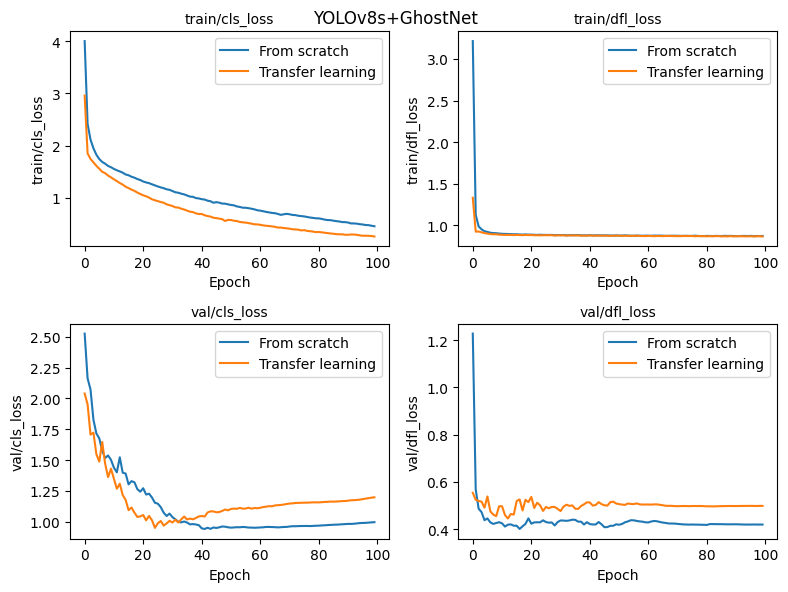

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the first CSV file (scratch.csv)
scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet/results.csv")

# Read the data from the second CSV file (TL.csv)
tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet+TL/results.csv")

# Extract the 'train/boxloss' column from each dataset
scratch_loss = scratch_data["         train/cls_loss"]
tl_loss = tl_data["         train/cls_loss"]

# Create the x-axis values (assumed to be the indices of the datasets)
epochs = scratch_data['                  epoch']

# Create a new figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot graph 1 (top-left)
axs[0, 0].plot(epochs, scratch_loss, label='From scratch')
axs[0, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 0].set_title('train/cls_loss', fontsize=10)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('train/cls_loss')
axs[0, 0].legend()

scratch_loss = scratch_data["         train/dfl_loss"]
tl_loss = tl_data["         train/dfl_loss"]

# Plot graph 2 (top-right)
axs[0, 1].plot(epochs, scratch_loss, label='From scratch')
axs[0, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 1].set_title('train/dfl_loss', fontsize=10)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('train/dfl_loss')
axs[0, 1].legend()

scratch_loss = scratch_data["           val/cls_loss"]
tl_loss = tl_data["           val/cls_loss"]

# Plot graph 2 (top-right)
axs[1, 0].plot(epochs, scratch_loss, label='From scratch')
axs[1, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 0].set_title('val/cls_loss', fontsize=10)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('val/cls_loss')
axs[1, 0].legend()

scratch_loss = scratch_data["           val/dfl_loss"]
tl_loss = tl_data["           val/dfl_loss"]

# Plot graph 2 (top-right)
axs[1, 1].plot(epochs, scratch_loss, label='From scratch')
axs[1, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 1].set_title('val/dfl_loss', fontsize=10)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('val/dfl_loss')
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle('YOLOv8s+GhostNet')
# Show the graph
plt.show()


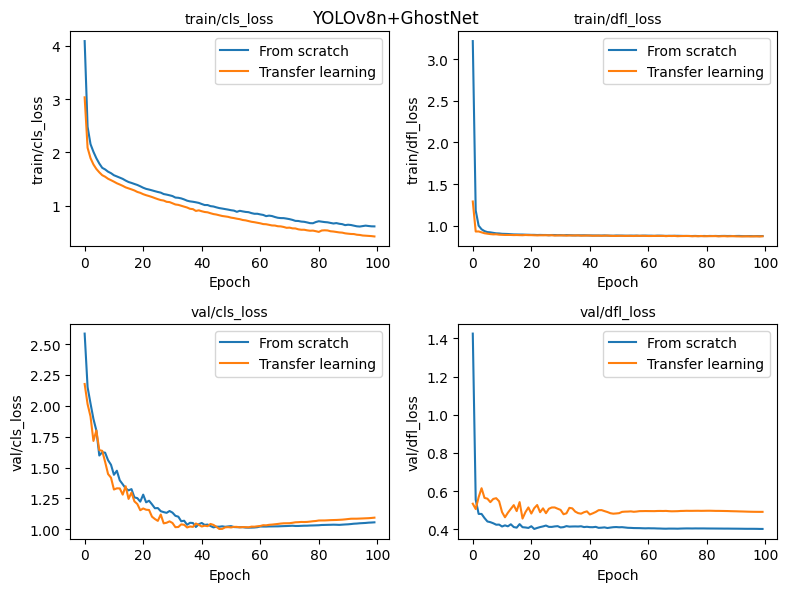

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the first CSV file (scratch.csv)
scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet/results.csv")

# Read the data from the second CSV file (TL.csv)
tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+TL/results.csv")

# Extract the 'train/boxloss' column from each dataset
scratch_loss = scratch_data["         train/cls_loss"]
tl_loss = tl_data["         train/cls_loss"]

# Create the x-axis values (assumed to be the indices of the datasets)
epochs = scratch_data['                  epoch']

# Create a new figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot graph 1 (top-left)
axs[0, 0].plot(epochs, scratch_loss, label='From scratch')
axs[0, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 0].set_title('train/cls_loss', fontsize=10)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('train/cls_loss')
axs[0, 0].legend()

scratch_loss = scratch_data["         train/dfl_loss"]
tl_loss = tl_data["         train/dfl_loss"]

# Plot graph 2 (top-right)
axs[0, 1].plot(epochs, scratch_loss, label='From scratch')
axs[0, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 1].set_title('train/dfl_loss', fontsize=10)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('train/dfl_loss')
axs[0, 1].legend()

scratch_loss = scratch_data["           val/cls_loss"]
tl_loss = tl_data["           val/cls_loss"]

# Plot graph 2 (top-right)
axs[1, 0].plot(epochs, scratch_loss, label='From scratch')
axs[1, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 0].set_title('val/cls_loss', fontsize=10)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('val/cls_loss')
axs[1, 0].legend()

scratch_loss = scratch_data["           val/dfl_loss"]
tl_loss = tl_data["           val/dfl_loss"]

# Plot graph 2 (top-right)
axs[1, 1].plot(epochs, scratch_loss, label='From scratch')
axs[1, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 1].set_title('val/dfl_loss', fontsize=10)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('val/dfl_loss')
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle('YOLOv8n+GhostNet')
# Show the graph
plt.show()


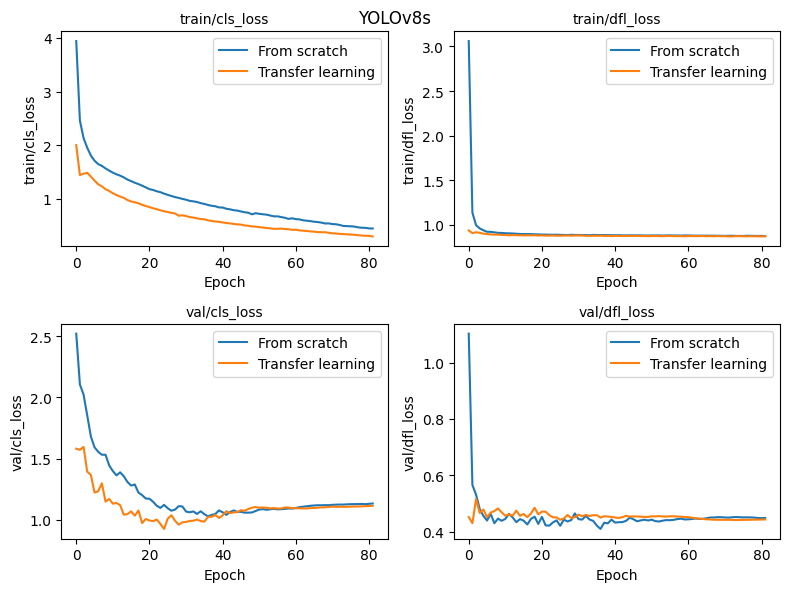

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the first CSV file (scratch.csv)
scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/scratch/results.csv", nrows=82)

# Read the data from the second CSV file (TL.csv)
tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/TL416/results.csv")

# Extract the 'train/boxloss' column from each dataset
scratch_loss = scratch_data["         train/cls_loss"]
tl_loss = tl_data["         train/cls_loss"]

# Create the x-axis values (assumed to be the indices of the datasets)
epochs = scratch_data['                  epoch']

# Create a new figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot graph 1 (top-left)
axs[0, 0].plot(epochs, scratch_loss, label='From scratch')
axs[0, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 0].set_title('train/cls_loss', fontsize=10)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('train/cls_loss')
axs[0, 0].legend()

scratch_loss = scratch_data["         train/dfl_loss"]
tl_loss = tl_data["         train/dfl_loss"]

# Plot graph 2 (top-right)
axs[0, 1].plot(epochs, scratch_loss, label='From scratch')
axs[0, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 1].set_title('train/dfl_loss', fontsize=10)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('train/dfl_loss')
axs[0, 1].legend()

scratch_loss = scratch_data["           val/cls_loss"]
tl_loss = tl_data["           val/cls_loss"]

# Plot graph 2 (top-right)
axs[1, 0].plot(epochs, scratch_loss, label='From scratch')
axs[1, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 0].set_title('val/cls_loss', fontsize=10)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('val/cls_loss')
axs[1, 0].legend()

scratch_loss = scratch_data["           val/dfl_loss"]
tl_loss = tl_data["           val/dfl_loss"]

# Plot graph 2 (top-right)
axs[1, 1].plot(epochs, scratch_loss, label='From scratch')
axs[1, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 1].set_title('val/dfl_loss', fontsize=10)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('val/dfl_loss')
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle('YOLOv8s')
# Show the graph
plt.show()


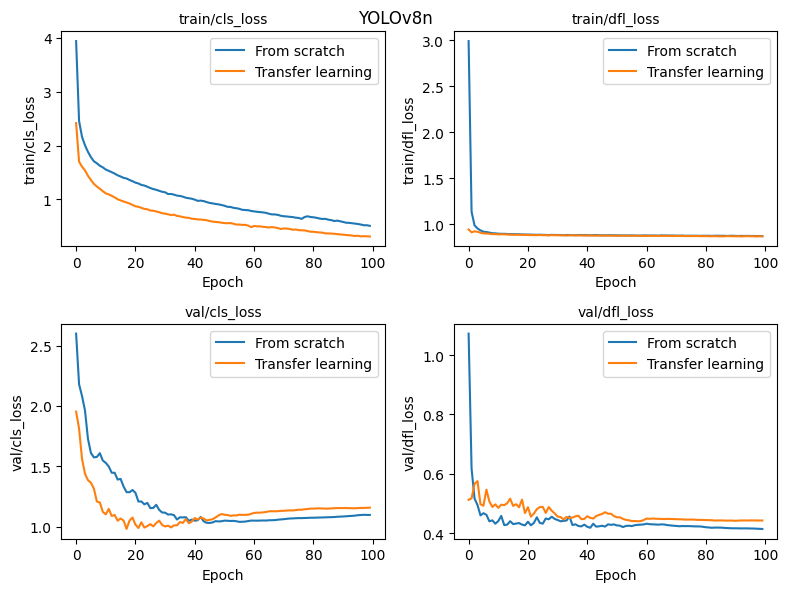

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the first CSV file (scratch.csv)
scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/scratch/results.csv")

# Read the data from the second CSV file (TL.csv)
tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/TL/results.csv")

# Extract the 'train/boxloss' column from each dataset
scratch_loss = scratch_data["         train/cls_loss"]
tl_loss = tl_data["         train/cls_loss"]

# Create the x-axis values (assumed to be the indices of the datasets)
epochs = scratch_data['                  epoch']

# Create a new figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot graph 1 (top-left)
axs[0, 0].plot(epochs, scratch_loss, label='From scratch')
axs[0, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 0].set_title('train/cls_loss', fontsize=10)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('train/cls_loss')
axs[0, 0].legend()

scratch_loss = scratch_data["         train/dfl_loss"]
tl_loss = tl_data["         train/dfl_loss"]

# Plot graph 2 (top-right)
axs[0, 1].plot(epochs, scratch_loss, label='From scratch')
axs[0, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 1].set_title('train/dfl_loss', fontsize=10)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('train/dfl_loss')
axs[0, 1].legend()

scratch_loss = scratch_data["           val/cls_loss"]
tl_loss = tl_data["           val/cls_loss"]

# Plot graph 2 (top-right)
axs[1, 0].plot(epochs, scratch_loss, label='From scratch')
axs[1, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 0].set_title('val/cls_loss', fontsize=10)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('val/cls_loss')
axs[1, 0].legend()

scratch_loss = scratch_data["           val/dfl_loss"]
tl_loss = tl_data["           val/dfl_loss"]

# Plot graph 2 (top-right)
axs[1, 1].plot(epochs, scratch_loss, label='From scratch')
axs[1, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 1].set_title('val/dfl_loss', fontsize=10)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('val/dfl_loss')
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle('YOLOv8n')
# Show the graph
plt.show()


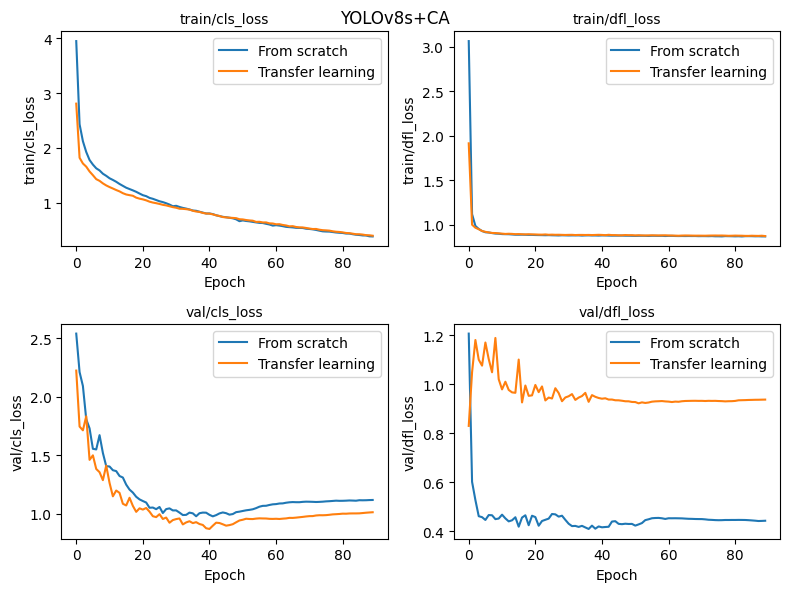

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the first CSV file (scratch.csv)
scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/CA/results.csv", nrows=90)

# Read the data from the second CSV file (TL.csv)
tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/CA+TL416/results.csv")

# Extract the 'train/boxloss' column from each dataset
scratch_loss = scratch_data["         train/cls_loss"]
tl_loss = tl_data["         train/cls_loss"]

# Create the x-axis values (assumed to be the indices of the datasets)
epochs = scratch_data['                  epoch']

# Create a new figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot graph 1 (top-left)
axs[0, 0].plot(epochs, scratch_loss, label='From scratch')
axs[0, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 0].set_title('train/cls_loss', fontsize=10)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('train/cls_loss')
axs[0, 0].legend()

scratch_loss = scratch_data["         train/dfl_loss"]
tl_loss = tl_data["         train/dfl_loss"]

# Plot graph 2 (top-right)
axs[0, 1].plot(epochs, scratch_loss, label='From scratch')
axs[0, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 1].set_title('train/dfl_loss', fontsize=10)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('train/dfl_loss')
axs[0, 1].legend()

scratch_loss = scratch_data["           val/cls_loss"]
tl_loss = tl_data["           val/cls_loss"]

# Plot graph 2 (top-right)
axs[1, 0].plot(epochs, scratch_loss, label='From scratch')
axs[1, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 0].set_title('val/cls_loss', fontsize=10)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('val/cls_loss')
axs[1, 0].legend()

scratch_loss = scratch_data["           val/dfl_loss"]
tl_loss = tl_data["           val/dfl_loss"]

# Plot graph 2 (top-right)
axs[1, 1].plot(epochs, scratch_loss, label='From scratch')
axs[1, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 1].set_title('val/dfl_loss', fontsize=10)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('val/dfl_loss')
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle('YOLOv8s+CA')
# Show the graph
plt.show()


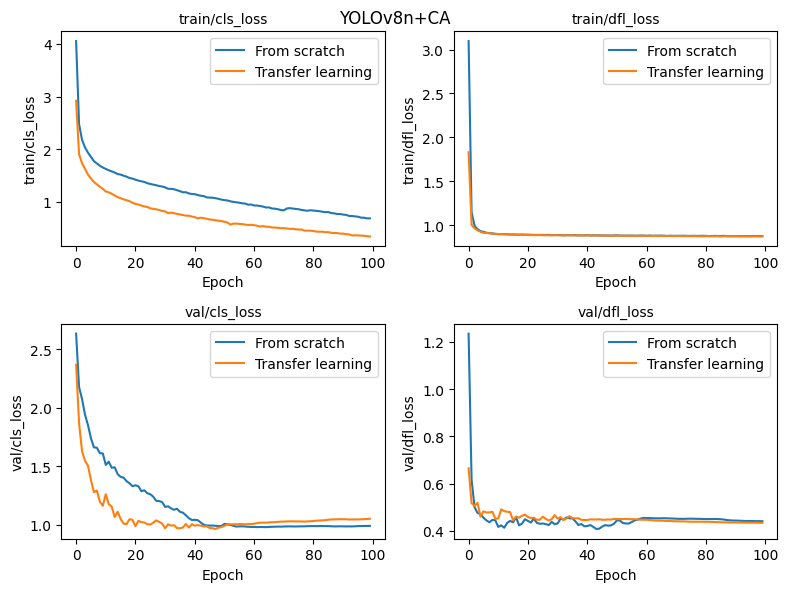

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the first CSV file (scratch.csv)
scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/CA/results.csv")

# Read the data from the second CSV file (TL.csv)
tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/CA+TL/results.csv")

# Extract the 'train/boxloss' column from each dataset
scratch_loss = scratch_data["         train/cls_loss"]
tl_loss = tl_data["         train/cls_loss"]

# Create the x-axis values (assumed to be the indices of the datasets)
epochs = scratch_data['                  epoch']

# Create a new figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot graph 1 (top-left)
axs[0, 0].plot(epochs, scratch_loss, label='From scratch')
axs[0, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 0].set_title('train/cls_loss', fontsize=10)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('train/cls_loss')
axs[0, 0].legend()

scratch_loss = scratch_data["         train/dfl_loss"]
tl_loss = tl_data["         train/dfl_loss"]

# Plot graph 2 (top-right)
axs[0, 1].plot(epochs, scratch_loss, label='From scratch')
axs[0, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 1].set_title('train/dfl_loss', fontsize=10)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('train/dfl_loss')
axs[0, 1].legend()

scratch_loss = scratch_data["           val/cls_loss"]
tl_loss = tl_data["           val/cls_loss"]

# Plot graph 2 (top-right)
axs[1, 0].plot(epochs, scratch_loss, label='From scratch')
axs[1, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 0].set_title('val/cls_loss', fontsize=10)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('val/cls_loss')
axs[1, 0].legend()

scratch_loss = scratch_data["           val/dfl_loss"]
tl_loss = tl_data["           val/dfl_loss"]

# Plot graph 2 (top-right)
axs[1, 1].plot(epochs, scratch_loss, label='From scratch')
axs[1, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 1].set_title('val/dfl_loss', fontsize=10)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('val/dfl_loss')
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle('YOLOv8n+CA')
# Show the graph
plt.show()


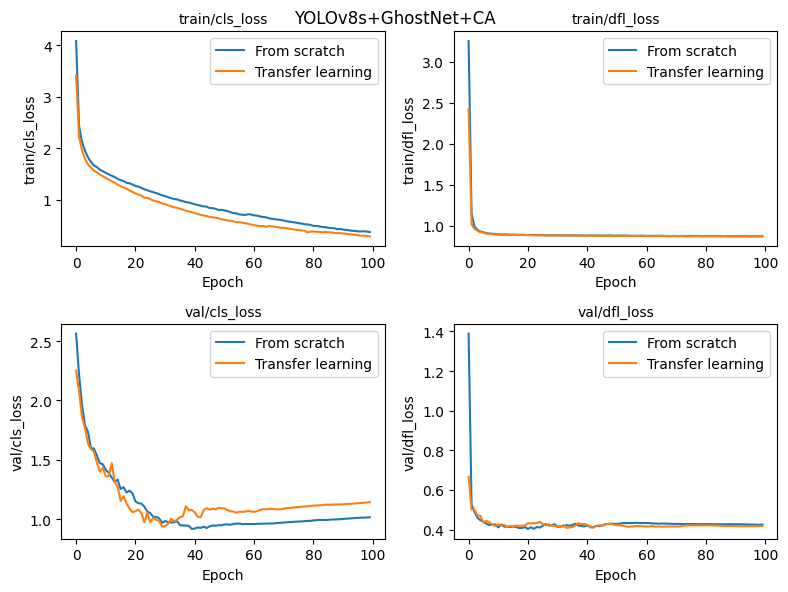

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the first CSV file (scratch.csv)
scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet+CA/results.csv", nrows=100)

# Read the data from the second CSV file (TL.csv)
tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8s/GhostNet+CA+TL/results.csv", nrows=100)

# Extract the 'train/boxloss' column from each dataset
scratch_loss = scratch_data["         train/cls_loss"]
tl_loss = tl_data["         train/cls_loss"]

# Create the x-axis values (assumed to be the indices of the datasets)
epochs = scratch_data['                  epoch']

# Create a new figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot graph 1 (top-left)
axs[0, 0].plot(epochs, scratch_loss, label='From scratch')
axs[0, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 0].set_title('train/cls_loss', fontsize=10)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('train/cls_loss')
axs[0, 0].legend()

scratch_loss = scratch_data["         train/dfl_loss"]
tl_loss = tl_data["         train/dfl_loss"]

# Plot graph 2 (top-right)
axs[0, 1].plot(epochs, scratch_loss, label='From scratch')
axs[0, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 1].set_title('train/dfl_loss', fontsize=10)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('train/dfl_loss')
axs[0, 1].legend()

scratch_loss = scratch_data["           val/cls_loss"]
tl_loss = tl_data["           val/cls_loss"]

# Plot graph 2 (top-right)
axs[1, 0].plot(epochs, scratch_loss, label='From scratch')
axs[1, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 0].set_title('val/cls_loss', fontsize=10)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('val/cls_loss')
axs[1, 0].legend()

scratch_loss = scratch_data["           val/dfl_loss"]
tl_loss = tl_data["           val/dfl_loss"]

# Plot graph 2 (top-right)
axs[1, 1].plot(epochs, scratch_loss, label='From scratch')
axs[1, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 1].set_title('val/dfl_loss', fontsize=10)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('val/dfl_loss')
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle('YOLOv8s+GhostNet+CA')
# Show the graph
plt.show()


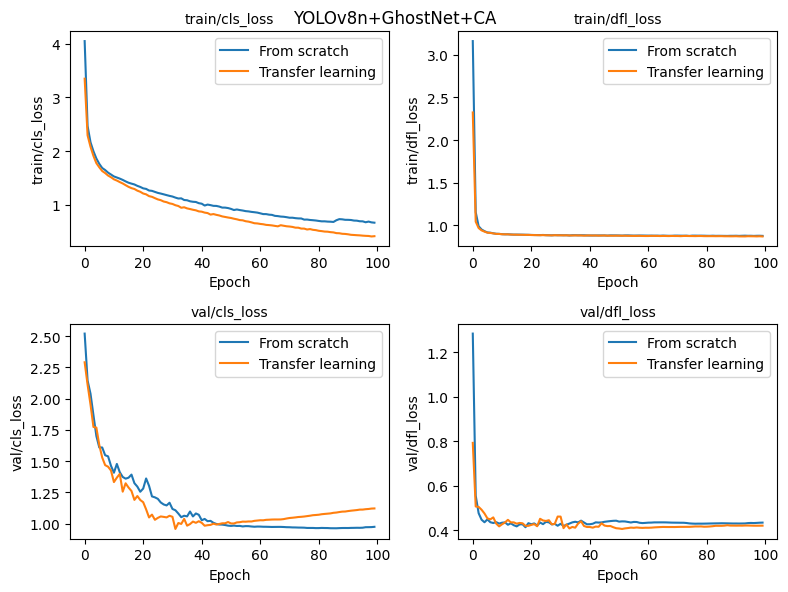

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the first CSV file (scratch.csv)
scratch_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+CA/results.csv", nrows=100)

# Read the data from the second CSV file (TL.csv)
tl_data = pd.read_csv("/content/drive/MyDrive/FYPTraining/YOLOv8n/GhostNet+CA+TL/results.csv", nrows=100)

# Extract the 'train/boxloss' column from each dataset
scratch_loss = scratch_data["         train/cls_loss"]
tl_loss = tl_data["         train/cls_loss"]

# Create the x-axis values (assumed to be the indices of the datasets)
epochs = scratch_data['                  epoch']

# Create a new figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

# Plot graph 1 (top-left)
axs[0, 0].plot(epochs, scratch_loss, label='From scratch')
axs[0, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 0].set_title('train/cls_loss', fontsize=10)
axs[0, 0].set_xlabel('Epoch')
axs[0, 0].set_ylabel('train/cls_loss')
axs[0, 0].legend()

scratch_loss = scratch_data["         train/dfl_loss"]
tl_loss = tl_data["         train/dfl_loss"]

# Plot graph 2 (top-right)
axs[0, 1].plot(epochs, scratch_loss, label='From scratch')
axs[0, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[0, 1].set_title('train/dfl_loss', fontsize=10)
axs[0, 1].set_xlabel('Epoch')
axs[0, 1].set_ylabel('train/dfl_loss')
axs[0, 1].legend()

scratch_loss = scratch_data["           val/cls_loss"]
tl_loss = tl_data["           val/cls_loss"]

# Plot graph 2 (top-right)
axs[1, 0].plot(epochs, scratch_loss, label='From scratch')
axs[1, 0].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 0].set_title('val/cls_loss', fontsize=10)
axs[1, 0].set_xlabel('Epoch')
axs[1, 0].set_ylabel('val/cls_loss')
axs[1, 0].legend()

scratch_loss = scratch_data["           val/dfl_loss"]
tl_loss = tl_data["           val/dfl_loss"]

# Plot graph 2 (top-right)
axs[1, 1].plot(epochs, scratch_loss, label='From scratch')
axs[1, 1].plot(epochs, tl_loss, label='Transfer learning')
axs[1, 1].set_title('val/dfl_loss', fontsize=10)
axs[1, 1].set_xlabel('Epoch')
axs[1, 1].set_ylabel('val/dfl_loss')
axs[1, 1].legend()

plt.tight_layout()
plt.suptitle('YOLOv8n+GhostNet+CA')
# Show the graph
plt.show()
